In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
airbnb_listings=pd.read_csv("./listings.csv")

airbnb_neighbourhoods_geo=gpd.read_file("./neighbourhoods.geojson")


In [3]:
# fetching the number of rows & columns of the data set
airbnb_listings.shape

(16640, 18)

In [4]:
# Dropping the unncessary columns.
airbnb_listings = airbnb_listings.drop(['neighbourhood_group','license'], axis =1)
airbnb_listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,45305964,Lumpini ville Nakhon in - River view studio Cozy,177103834,Thanat,Bang Sue,13.83689,100.50330,Entire home/apt,388,360,0,NaN,NaN,1,365,0
1,8975471,[Monthly] Plum Condominium Paholyothin 89,46549310,Chakree,Don Mueang,13.96994,100.61852,Private room,5000,300,0,NaN,NaN,1,362,0
2,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,2034,3,65,2020-01-06,0.51,2,362,0
3,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1405,1,0,NaN,NaN,2,358,0
4,31508092,Room for rent good and cheap,223483764,Huangseng,Bang Na,13.66075,100.57991,Private room,700,1,0,NaN,NaN,1,365,0


In [5]:
# Dropping the unncessary columns.
airbnb_neighbourhoods_geo = airbnb_neighbourhoods_geo.drop(['neighbourhood_group'], axis =1)
airbnb_neighbourhoods_geo.head()

,neighbourhood,geometry
0,Bang Phlat,"MULTIPOLYGON (((100.51649 13.80034, 100.51622 ..."
1,Huai Khwang,"MULTIPOLYGON (((100.58853 13.80282, 100.58852 ..."
2,Wang Thong Lang,"MULTIPOLYGON (((100.61295 13.79495, 100.61306 ..."
3,Thawi Watthana,"MULTIPOLYGON (((100.39673 13.80187, 100.39802 ..."
4,Lat Krabang,"MULTIPOLYGON (((100.79514 13.79399, 100.79516 ..."


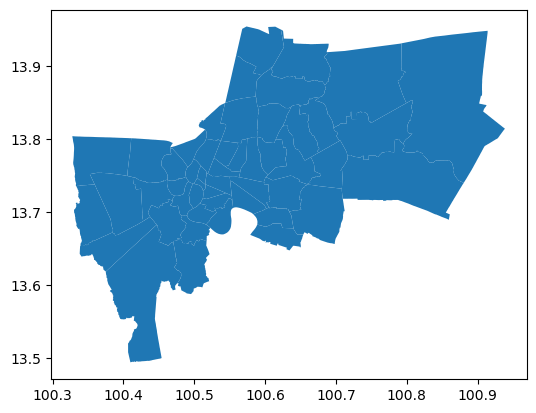

In [6]:
viz_1 = airbnb_neighbourhoods_geo.plot()

In [7]:
# observing the data types of each column within the data set
airbnb_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [8]:
airbnb_neighbourhoods_geo.dtypes

neighbourhood      object
geometry         geometry
dtype: object

In [9]:
# checking the number of observations in each column 
airbnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16640 non-null  int64  
 1   name                            16631 non-null  object 
 2   host_id                         16640 non-null  int64  
 3   host_name                       16640 non-null  object 
 4   neighbourhood                   16640 non-null  object 
 5   latitude                        16640 non-null  float64
 6   longitude                       16640 non-null  float64
 7   room_type                       16640 non-null  object 
 8   price                           16640 non-null  int64  
 9   minimum_nights                  16640 non-null  int64  
 10  number_of_reviews               16640 non-null  int64  
 11  last_review                     10067 non-null  object 
 12  reviews_per_month               

In [10]:
# checking for duplicates
duplicateRows = airbnb_listings[airbnb_listings.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


In [11]:
airbnb_listings.isnull().sum()


id                                   0
name                                 9
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6573
reviews_per_month                 6573
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [12]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb_listings.fillna({'reviews_per_month':0}, inplace=True)

#replacing all NaN values in 'last_review' with 0
airbnb_listings.fillna({'last_review':0}, inplace=True)

In [13]:
airbnb_listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [14]:
top_host=airbnb_listings.host_name.value_counts().head(10)
top_host

Curry       207
Noons        91
K            86
Pornchai     74
Gravity      69
Bee          65
Alex         64
Dusadee      62
Zuzu         59
George       58
Name: host_name, dtype: int64

In [15]:
top_host_check=airbnb_listings.calculated_host_listings_count.max()
top_host_check

207

In [16]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_Name', 'host_name':'P_Count'}, inplace=True)
top_host_df

,Host_Name,P_Count
0,Curry,207
1,Noons,91
2,K,86
3,Pornchai,74
4,Gravity,69
5,Bee,65
6,Alex,64
7,Dusadee,62
8,Zuzu,59
9,George,58


[Text(0, 0, 'Curry'),
 Text(1, 0, 'Noons'),
 Text(2, 0, 'K'),
 Text(3, 0, 'Pornchai'),
 Text(4, 0, 'Gravity'),
 Text(5, 0, 'Bee'),
 Text(6, 0, 'Alex'),
 Text(7, 0, 'Dusadee'),
 Text(8, 0, 'Zuzu'),
 Text(9, 0, 'George')]

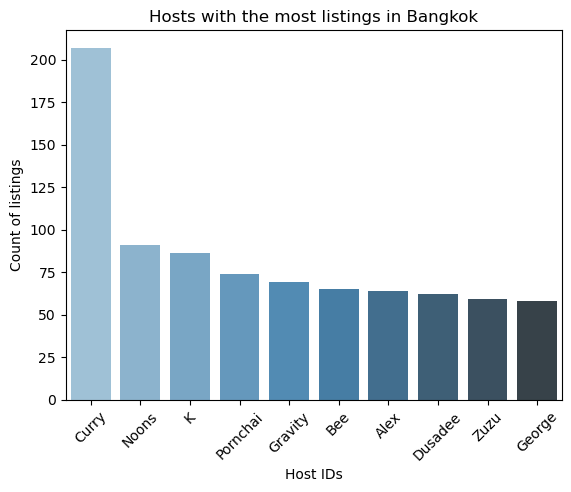

In [17]:
viz_1=sns.barplot(x="Host_Name", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Bangkok')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [18]:
#finding out top 10 neighbourhoods
airbnb_listings.neighbourhood.value_counts().head(10)

Khlong Toei     2101
Vadhana         2093
Ratchathewi     1082
Huai Khwang     1079
Bang Rak         835
Sathon           754
Bang Na          686
Phra Nakhon      592
Phra Khanong     575
Chatu Chak       541
Name: neighbourhood, dtype: int64

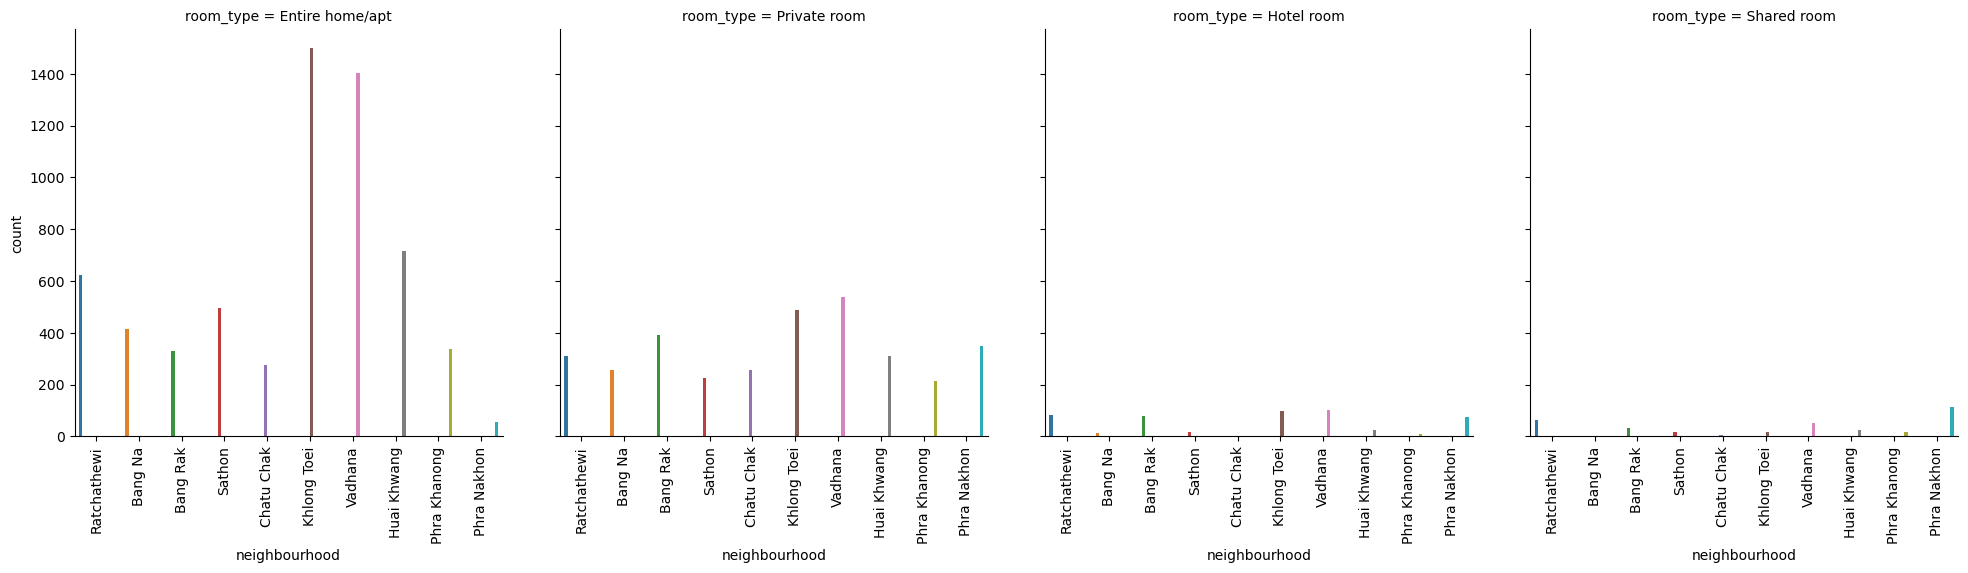

In [19]:
#grabbing top 10 neighbourhoods for sub-dataframe
sub_1=airbnb_listings.loc[airbnb_listings['neighbourhood'].isin(['Khlong Toei','Vadhana','Huai Khwang','Sathon',
                 'Phra Nakhon','Phra Khanong','Chatu Chak','Bang Na','Bang Rak','Ratchathewi'])]
#using catplot to represent multiple interesting attributes together and a count
viz_2=sns.catplot(x='neighbourhood', hue='neighbourhood', col='room_type', data=sub_1, kind='count')
viz_2.set_xticklabels(rotation=90)

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


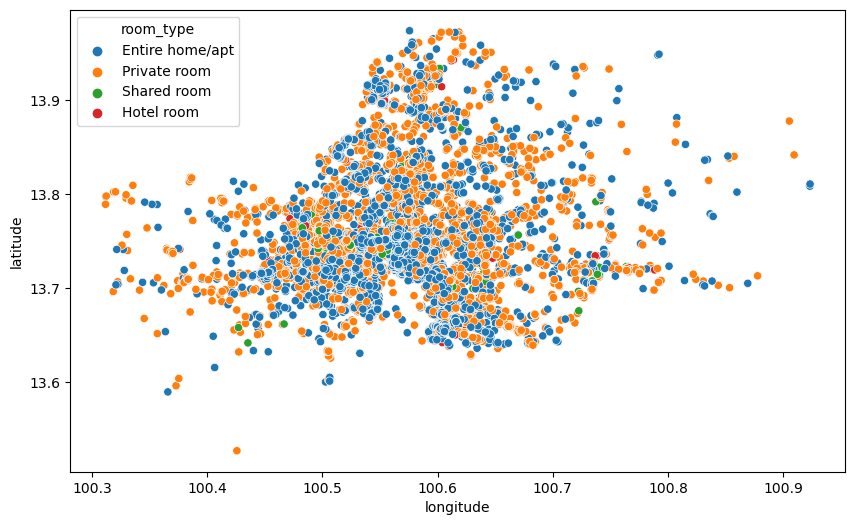

In [20]:
#Scatter plot of room type
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_listings.longitude,airbnb_listings.latitude,hue=airbnb_listings.room_type)
plt.ioff()

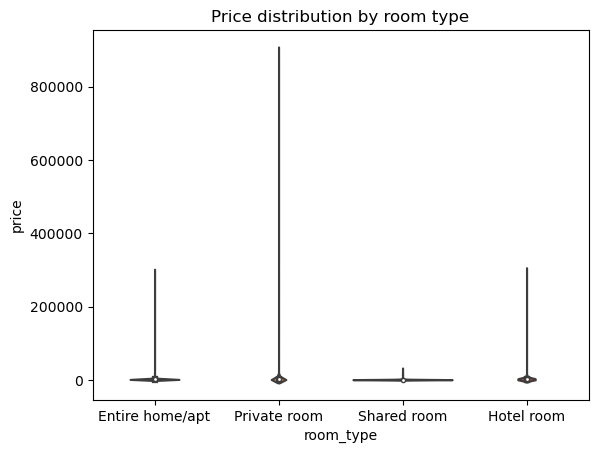

In [21]:
#Observing price distribution by room type
viz_3=sns.violinplot(data=airbnb_listings, x='room_type', y='price',inner='box')
viz_3.set_title('Price distribution by room type')
plt.show()

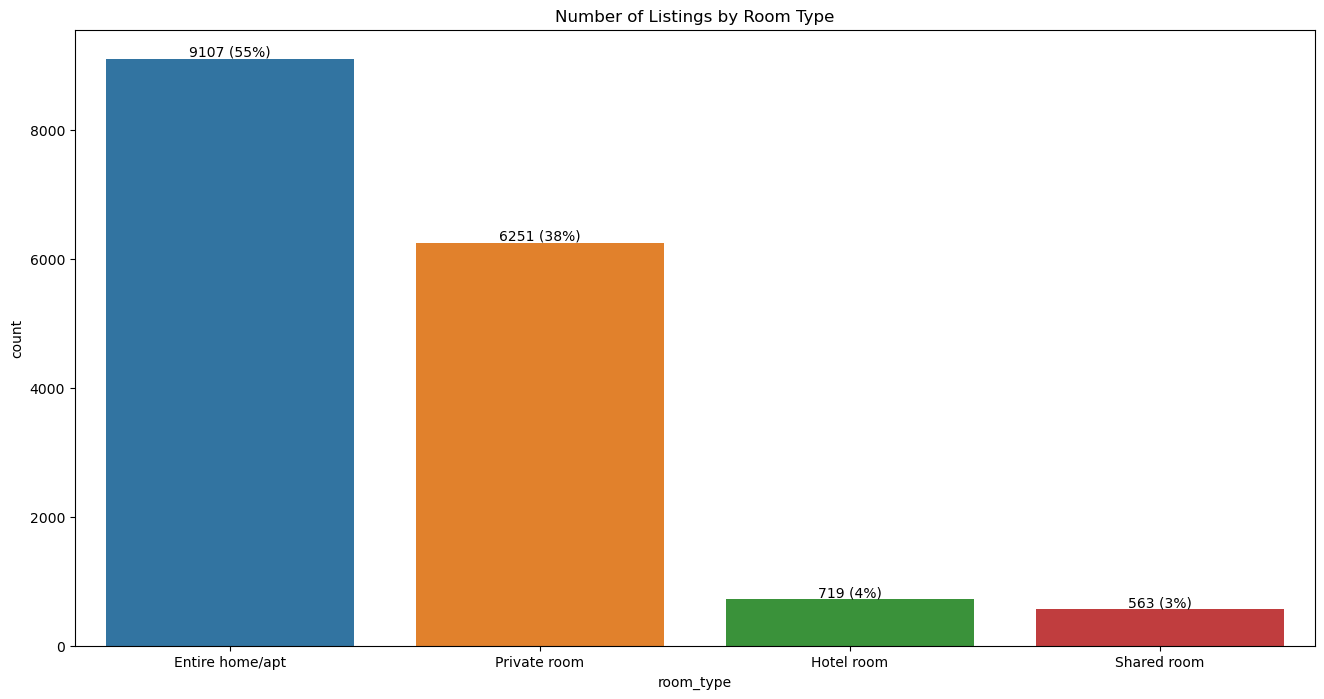

In [22]:
# using countplot to visualize the number of Airbnbs by room type
plt.figure(figsize = (16,8))
ax = sns.countplot(x='room_type', data=airbnb_listings, order=airbnb_listings['room_type'].value_counts().index)
abs_values = airbnb_listings['room_type'].value_counts(ascending=False)
rel_values = airbnb_listings['room_type'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls) #puts the labels on the bars
ax.set_title('Number of Listings by Room Type')
plt.xticks(rotation=0)
plt.show()

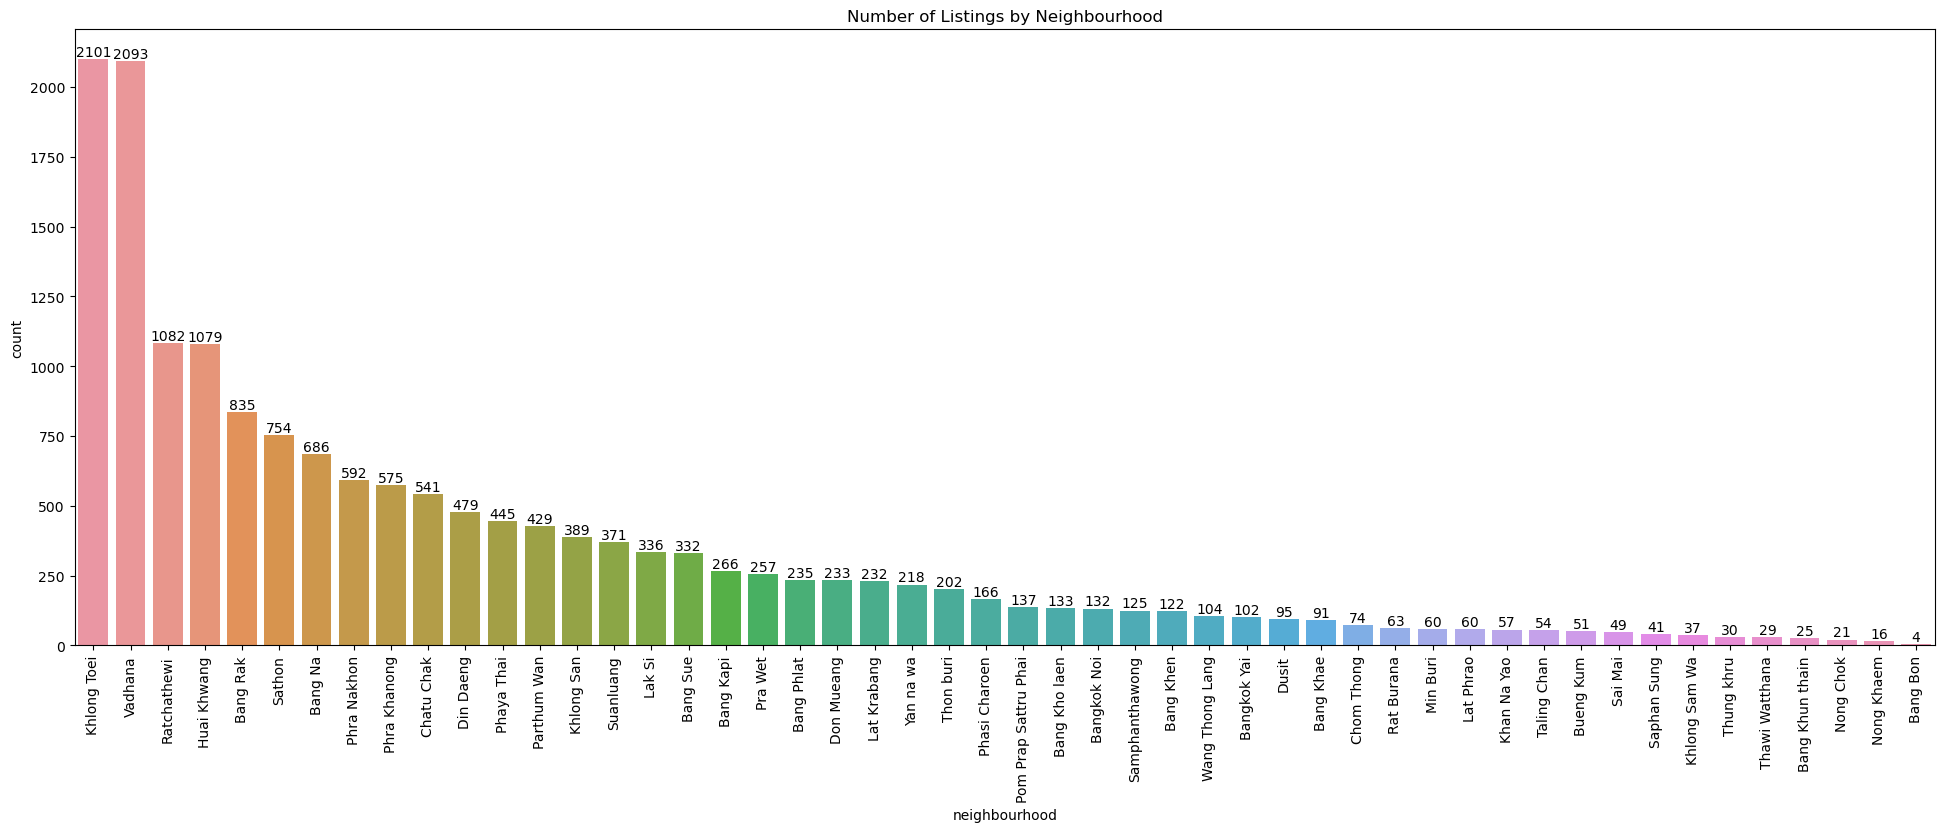

In [23]:
# using countplot to visualize the number of Airbnbs in each neighbourhood
plt.figure(figsize = (24,8))
ax = sns.countplot(x='neighbourhood', data=airbnb_listings, order=airbnb_listings['neighbourhood'].value_counts().index)
abs_values = airbnb_listings['neighbourhood'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.show()